
Training MLP with hidden sizes = [32, 16]
Epoch 0: Train Loss = 0.8556, Val Loss = 0.8727
Epoch 100: Train Loss = 0.5998, Val Loss = 0.5935
Epoch 200: Train Loss = 0.5889, Val Loss = 0.5802
Epoch 300: Train Loss = 0.5835, Val Loss = 0.5744
Epoch 400: Train Loss = 0.5788, Val Loss = 0.5699
Epoch 500: Train Loss = 0.5742, Val Loss = 0.5658
Epoch 600: Train Loss = 0.5699, Val Loss = 0.5619
Epoch 700: Train Loss = 0.5656, Val Loss = 0.5581
Epoch 800: Train Loss = 0.5613, Val Loss = 0.5544
Epoch 900: Train Loss = 0.5574, Val Loss = 0.5509
Epoch 1000: Train Loss = 0.5535, Val Loss = 0.5475
Epoch 1100: Train Loss = 0.5499, Val Loss = 0.5442
Epoch 1200: Train Loss = 0.5462, Val Loss = 0.5410
Epoch 1300: Train Loss = 0.5427, Val Loss = 0.5379
Epoch 1400: Train Loss = 0.5392, Val Loss = 0.5349
Epoch 1500: Train Loss = 0.5356, Val Loss = 0.5318
Epoch 1600: Train Loss = 0.5321, Val Loss = 0.5288
Epoch 1700: Train Loss = 0.5286, Val Loss = 0.5257
Epoch 1800: Train Loss = 0.5250, Val Loss = 0.5226


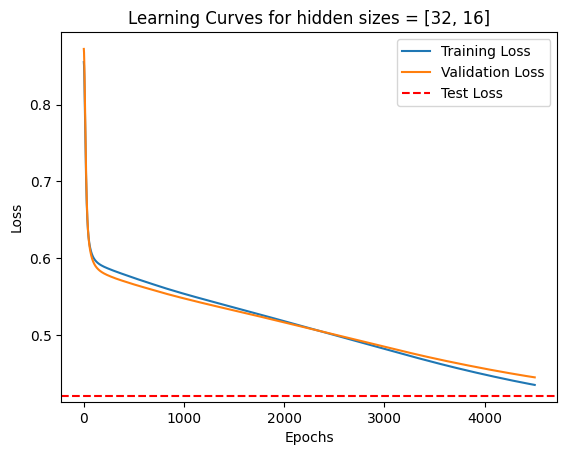


Training MLP with hidden sizes = [64, 32]
Epoch 0: Train Loss = 0.8623, Val Loss = 0.8468
Epoch 100: Train Loss = 0.5960, Val Loss = 0.5885
Epoch 200: Train Loss = 0.5774, Val Loss = 0.5701
Epoch 300: Train Loss = 0.5661, Val Loss = 0.5592
Epoch 400: Train Loss = 0.5574, Val Loss = 0.5509
Epoch 500: Train Loss = 0.5503, Val Loss = 0.5442
Epoch 600: Train Loss = 0.5438, Val Loss = 0.5383
Epoch 700: Train Loss = 0.5380, Val Loss = 0.5330
Epoch 800: Train Loss = 0.5325, Val Loss = 0.5281
Epoch 900: Train Loss = 0.5273, Val Loss = 0.5236
Epoch 1000: Train Loss = 0.5223, Val Loss = 0.5193
Epoch 1100: Train Loss = 0.5175, Val Loss = 0.5152
Epoch 1200: Train Loss = 0.5127, Val Loss = 0.5112
Epoch 1300: Train Loss = 0.5080, Val Loss = 0.5071
Epoch 1400: Train Loss = 0.5035, Val Loss = 0.5032
Epoch 1500: Train Loss = 0.4988, Val Loss = 0.4992
Epoch 1600: Train Loss = 0.4942, Val Loss = 0.4951
Epoch 1700: Train Loss = 0.4898, Val Loss = 0.4914
Epoch 1800: Train Loss = 0.4855, Val Loss = 0.4878


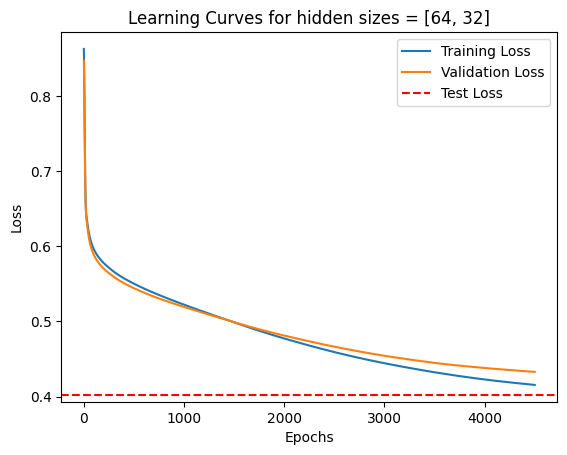


Training MLP with hidden sizes = [128, 64, 32]
Epoch 0: Train Loss = 0.8443, Val Loss = 0.8354
Epoch 100: Train Loss = 0.5955, Val Loss = 0.5873
Epoch 200: Train Loss = 0.5645, Val Loss = 0.5562
Epoch 300: Train Loss = 0.5491, Val Loss = 0.5418
Epoch 400: Train Loss = 0.5384, Val Loss = 0.5316
Epoch 500: Train Loss = 0.5295, Val Loss = 0.5236
Epoch 600: Train Loss = 0.5215, Val Loss = 0.5167
Epoch 700: Train Loss = 0.5139, Val Loss = 0.5104
Epoch 800: Train Loss = 0.5069, Val Loss = 0.5047
Epoch 900: Train Loss = 0.5006, Val Loss = 0.4997
Epoch 1000: Train Loss = 0.4947, Val Loss = 0.4951
Epoch 1100: Train Loss = 0.4891, Val Loss = 0.4906
Epoch 1200: Train Loss = 0.4839, Val Loss = 0.4866
Epoch 1300: Train Loss = 0.4780, Val Loss = 0.4816
Epoch 1400: Train Loss = 0.4730, Val Loss = 0.4776
Epoch 1500: Train Loss = 0.4681, Val Loss = 0.4741
Epoch 1600: Train Loss = 0.4634, Val Loss = 0.4707
Epoch 1700: Train Loss = 0.4591, Val Loss = 0.4676
Epoch 1800: Train Loss = 0.4550, Val Loss = 0.

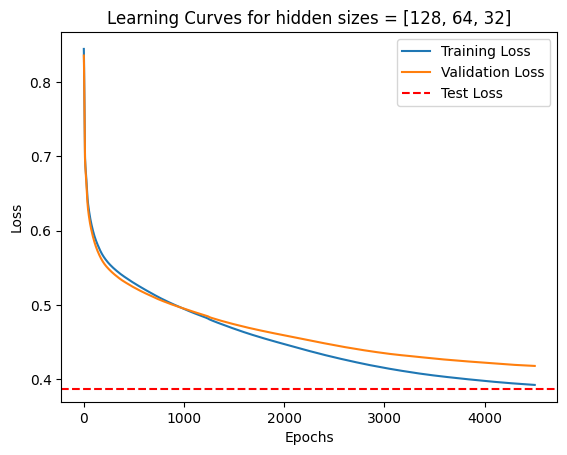

Best hidden sizes: [128, 64, 32], Test Accuracy: 83.05%


In [10]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

def load_data():
    train_0 = loadmat("train_class0.mat")["x"]
    train_1 = loadmat("train_class1.mat")["x"]
    test_0 = loadmat("test_class0.mat")["x"]
    test_1 = loadmat("test_class1.mat")["x"]
    return train_0, train_1, test_0, test_1

# Normalize data
def normalize_data(train_data, validation_data, test_data):
    mean = np.mean(train_data, axis=0)
    std = np.std(train_data, axis=0)
    train_norm = (train_data - mean) / std
    validation_norm = (validation_data - mean) / std
    test_norm = (test_data - mean) / std
    return train_norm, validation_norm, test_norm

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def initialize_weights(input_size, hidden_sizes, output_size):
    np.random.seed(42)
    weights = []
    sizes = [input_size] + hidden_sizes + [output_size]
    for i in range(1, len(sizes)):
        w = np.random.randn(sizes[i-1], sizes[i]) * np.sqrt(2 / sizes[i-1])
        b = np.zeros((1, sizes[i]))
        weights.append((w, b))
    return weights

def forward_propagation(X, weights):
    activations = [X]
    for i, (w, b) in enumerate(weights):
        z = np.dot(activations[-1], w) + b
        a = sigmoid(z) if i == len(weights) - 1 else np.maximum(0, z)
        activations.append(a)
    return activations

def backward_propagation(X, Y, activations, weights):
    m = X.shape[0]
    gradients = []
    delta = activations[-1] - Y
    for i in reversed(range(len(weights))):
        dW = np.dot(activations[i].T, delta) / m
        db = np.sum(delta, axis=0, keepdims=True) / m
        gradients.append((dW, db))
        if i > 0:
            delta = np.dot(delta, weights[i][0].T) * (activations[i] > 0)
    return list(reversed(gradients))

def update_weights(weights, gradients, learning_rate, velocities, momentum):
    new_weights = []
    new_velocities = []
    for (w, b), (dw, db), (vw, vb) in zip(weights, gradients, velocities):
        vw = momentum * vw + learning_rate * dw
        vb = momentum * vb + learning_rate * db
        new_weights.append((w - vw, b - vb))
        new_velocities.append((vw, vb))
    return new_weights, new_velocities

def train_mlp(X_train, Y_train, X_val, Y_val, hidden_sizes, epochs=1000, learning_rate=0.01, momentum=0.9):
    input_size = X_train.shape[1]
    output_size = 1
    weights = initialize_weights(input_size, hidden_sizes, output_size)
    velocities = [(np.zeros_like(w), np.zeros_like(b)) for w, b in weights]
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    patience, no_improvement = 10, 0

    for epoch in range(epochs):
        activations = forward_propagation(X_train, weights)
        train_loss = binary_cross_entropy_loss(Y_train, activations[-1])
        train_losses.append(train_loss)

        val_activations = forward_propagation(X_val, weights)
        val_loss = binary_cross_entropy_loss(Y_val, val_activations[-1])
        val_losses.append(val_loss)

        gradients = backward_propagation(X_train, Y_train, activations, weights)
        weights, velocities = update_weights(weights, gradients, learning_rate, velocities, momentum)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improvement = 0
        else:
            no_improvement += 1
        if no_improvement > patience:
            print(f"Early stopping at epoch {epoch}")
            break

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    return weights, train_losses, val_losses

def evaluate_accuracy(X, Y, weights):
    activations = forward_propagation(X, weights)
    predictions = (activations[-1] > 0.5).astype(int)
    accuracy = np.mean(predictions == Y) * 100
    return accuracy

train_0, train_1, test_0, test_1 = load_data()

X_train = np.vstack((train_0[:1500], train_1[:1500]))
Y_train = np.vstack((np.zeros((1500, 1)), np.ones((1500, 1))))

X_val = np.vstack((train_0[1500:], train_1[1500:]))
Y_val = np.vstack((np.zeros((500, 1)), np.ones((500, 1))))

X_test = np.vstack((test_0, test_1))
Y_test = np.vstack((np.zeros((1000, 1)), np.ones((1000, 1))))

X_train, X_val, X_test = normalize_data(X_train, X_val, X_test)


results = {}
for hidden_sizes in [[32, 16], [64, 32], [128, 64, 32]]:
    print(f"\nTraining MLP with hidden sizes = {hidden_sizes}")
    weights, train_losses, val_losses = train_mlp(X_train, Y_train, X_val, Y_val, hidden_sizes, epochs=4500, learning_rate=0.001, momentum=0.9)
    # Test loss
    test_activations = forward_propagation(X_test, weights)
    test_loss = binary_cross_entropy_loss(Y_test, test_activations[-1])

    test_accuracy = evaluate_accuracy(X_test, Y_test, weights)
    print(f"Test Accuracy for hidden sizes = {hidden_sizes}: {test_accuracy:.2f}%")
    results[str(hidden_sizes)] = test_accuracy

    plt.figure()
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.axhline(y=test_loss, color='r', linestyle='--', label="Test Loss")
    plt.title(f"Learning Curves for hidden sizes = {hidden_sizes}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
best_hidden_sizes = max(results, key=results.get)
print(f"Best hidden sizes: {best_hidden_sizes}, Test Accuracy: {results[best_hidden_sizes]:.2f}%")